<a href="https://colab.research.google.com/github/dekoska/computer-vision-course/blob/main/02_document-scanner/01_rectangle-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

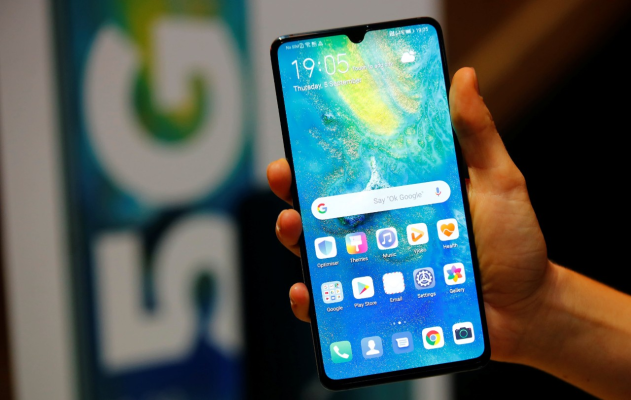

In [2]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

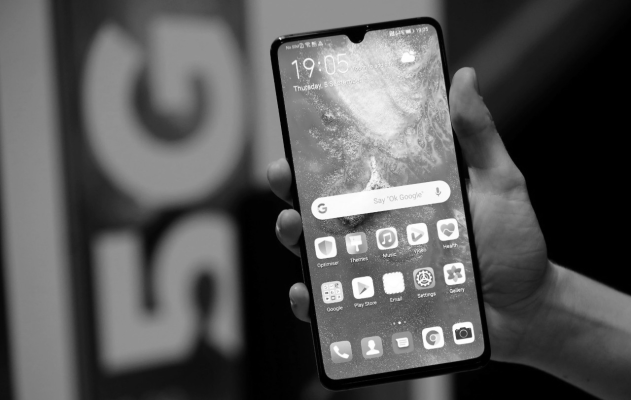

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

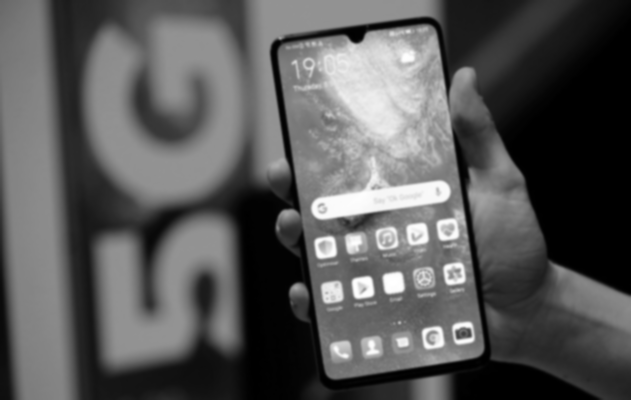

In [12]:
image_gray = cv2.GaussianBlur(image_gray, ksize=(5, 5), sigmaX=0)
cv2_imshow(gray_image)

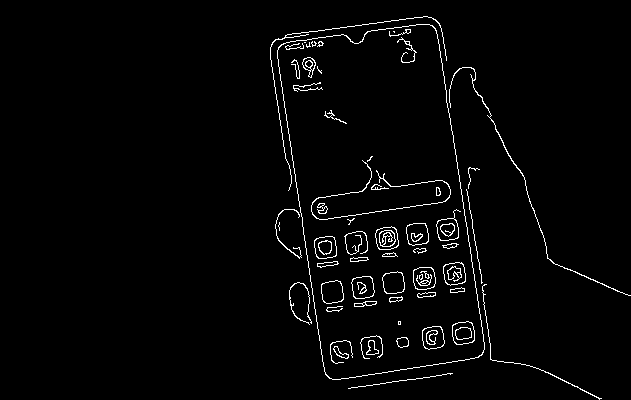

In [13]:
edges = cv2.Canny(image_gray, threshold1=70, threshold2=200)
cv2_imshow(edges)

In [14]:
contours = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

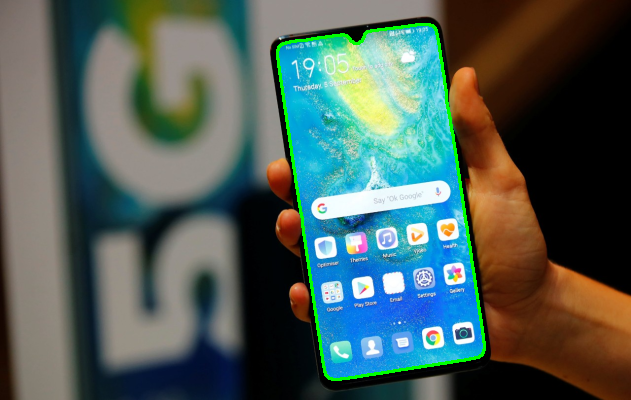

In [17]:
cn1 = cv2.drawContours(image.copy(), [contours[0]], contourIdx=-1, color=(0, 255, 0), thickness=2)
cv2_imshow(cn1)

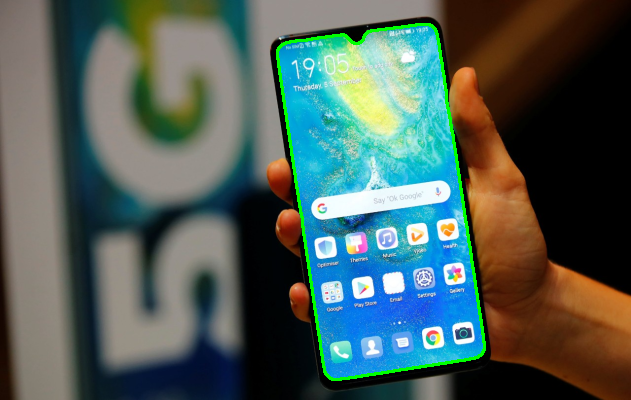

In [18]:
cn2 = cv2.drawContours(image.copy(), [contours[1]], contourIdx=-1, color=(0, 255, 0), thickness=2)
cv2_imshow(cn2)

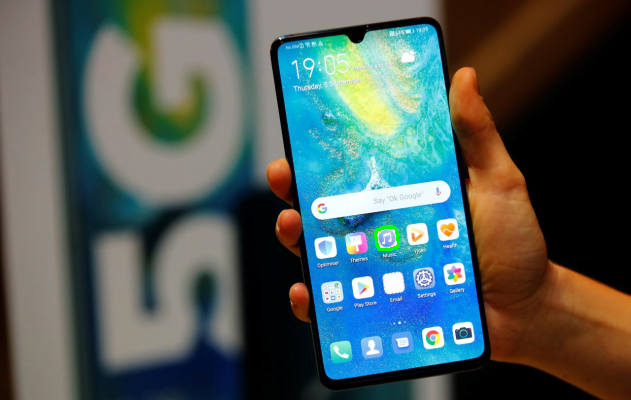

In [20]:
cn3 = cv2.drawContours(image.copy(), [contours[2]], contourIdx=-1, color=(0, 255, 0), thickness=2)
cv2_imshow(cn3)

### Detekcja prostokąta


In [21]:
screen_contour = None

for contour in contours:
  perimeter = cv2.arcLength(curve=contour, closed=True)
  approx = cv2.approxPolyDP(contour, epsilon=0.015 * perimeter, closed=True) #liczy wierzcholki

  if len(approx) == 4:
    screen_contour = approx
    break

In [22]:
screen_contour

array([[[429,  24]],

       [[277,  50]],

       [[332, 379]],

       [[484, 349]]], dtype=int32)

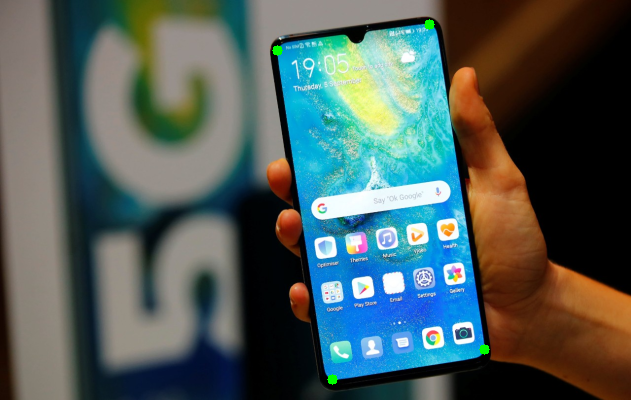

In [23]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)
cv2_imshow(vertices)

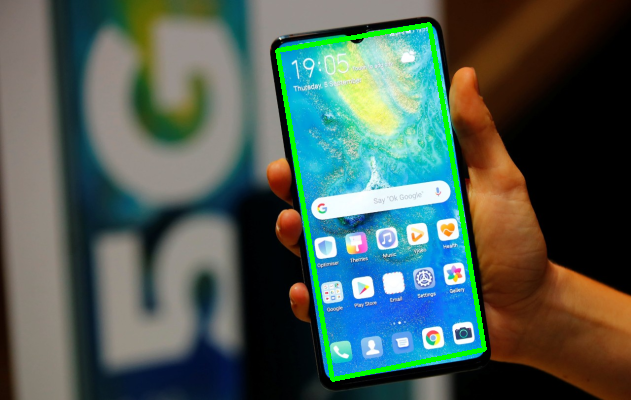

In [24]:
screen_contour = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(screen_contour)